In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('machine.data.txt', sep = ',', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
0    209 non-null object
1    209 non-null object
2    209 non-null int64
3    209 non-null int64
4    209 non-null int64
5    209 non-null int64
6    209 non-null int64
7    209 non-null int64
8    209 non-null int64
9    209 non-null int64
dtypes: int64(8), object(2)
memory usage: 14.7+ KB


In [4]:
data.describe()

,2,3,4,5,6,7,8,9
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [5]:
X = pd.get_dummies(data.iloc[:,:9])
X.head()

,2,3,4,5,6,7,8,0_adviser,0_amdahl,0_apollo,...,1_v8635,1_v8650,1_v8655,1_v8665,1_v8670,1_vax:11/730,1_vax:11/750,1_vax:11/780,1_vs-100,1_vs-90
0,125,256,6000,256,16,128,198,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29,8000,32000,32,8,32,269,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29,8000,32000,32,8,32,220,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,29,8000,32000,32,8,32,172,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,29,8000,16000,32,8,16,132,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = data.iloc[:,9]
Y.head()

0    199
1    253
2    253
3    253
4    132
Name: 9, dtype: int64

In [7]:
Y.describe()

count     209.000000
mean       99.330144
std       154.757102
min        15.000000
25%        28.000000
50%        45.000000
75%       101.000000
max      1238.000000
Name: 9, dtype: float64

In [8]:
# Plot continuous variables, not plot categorical features
plot = X.iloc[:,:7]
plot['Y'] = Y
plot.head()

,2,3,4,5,6,7,8,Y
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


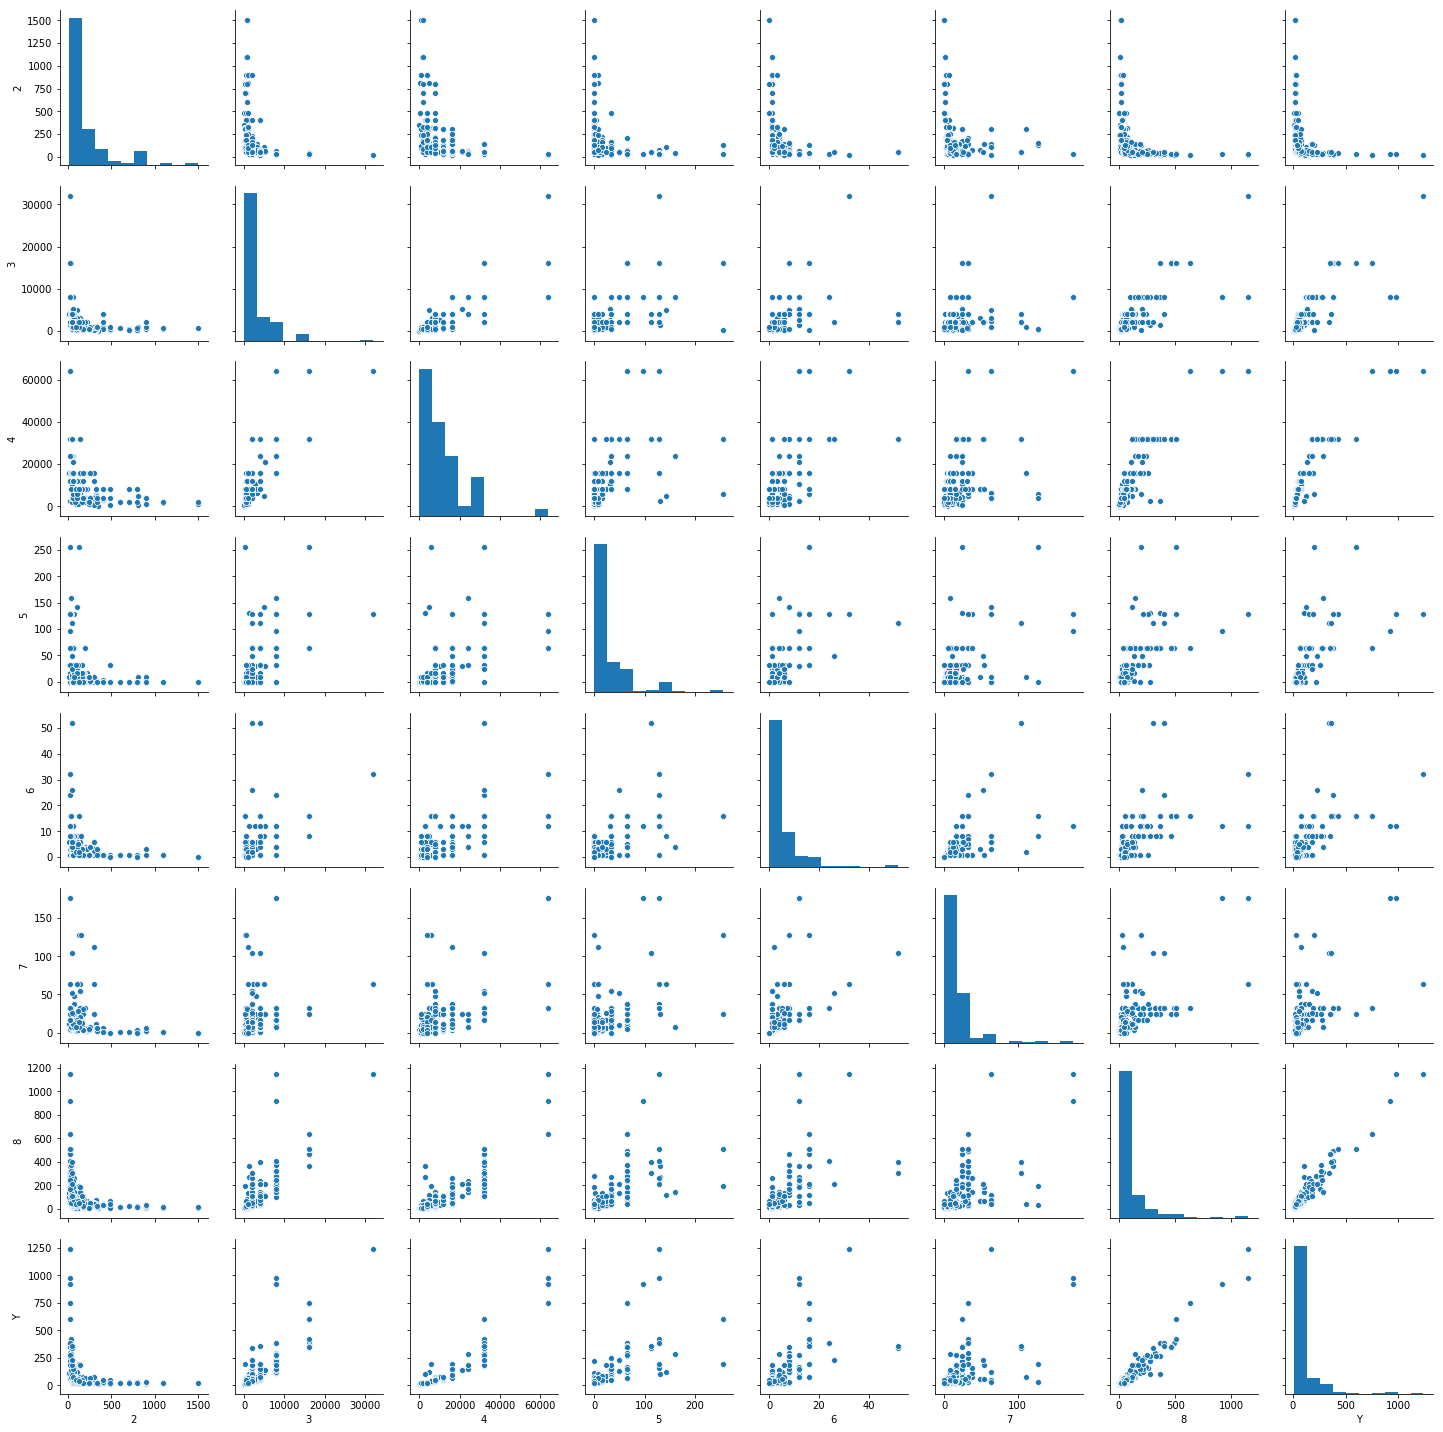

In [9]:
sb.pairplot(plot)

** Nhận xét bước đầu về dữ liệu: Dữ liệu không bị thiếu, nhưng số lượng mẫu hơi ít (chỉ có 208 mẫu). Có thể ta sẽ scale dữ liệu vì có chênh lệch giữa các cột (sau bước đánh giá đầu tiên). Và sau khi vẽ hình, ta thấy một số biến cũng có liên quan tuyến tính với nhau, ta có thể loại bỏ sau khi dự đoán (nếu kết quả thấp).

** Trước tiên em áp dụng thuật toán Linear Regression và chia dữ liệu train:test = 7:3 để có đánh giá đầu tiên

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.3, random_state = 42)

model1 = LinearRegression()
model1.fit(X_train1, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
Y_pred1 = model1.predict(X_test1)

In [12]:
model1.score(X_train1, Y_train1)

1.0

In [13]:
model1.score(X_test1, Y_test1)

0.9011520954241361

In [14]:
model1.score(X, Y)

0.9326335403866274

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean square Error: ", mean_squared_error(Y, model1.predict(X)))

Mean square Error:  1605.6909172921764


==> Mean square error is quite small for the output with the range up to thousand

In [16]:
print("Variance score: ", r2_score(Y_test1, Y_pred1))

Variance score:  0.9011520954241361


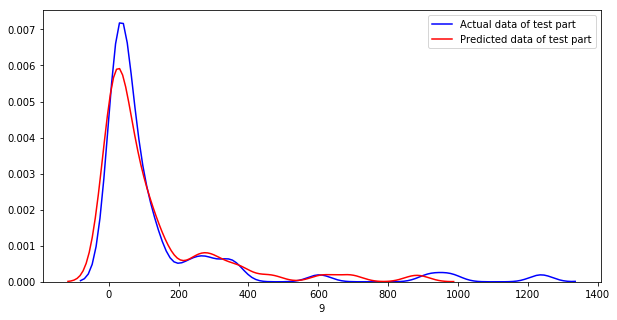

In [17]:
plt.figure(figsize = (10,5))
sb.distplot(Y_test1, hist = False, color = 'blue', label = 'Actual data of test part')
sb.distplot(Y_pred1, hist = False, color = 'red', label = 'Predicted data of test part')
plt.show()

==> Ta thấy khi đánh giá tập train và test đều cho ra score rất cao, mô hình không bị overfitting và underfitting. Còn variance score cũng đạt đến 90.1%, cho thấy mô hình Linear Regression rất với bộ dữ liệu trên

** Thử chia ra train:test = 8:2

In [18]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model2 = LinearRegression()
model2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
Y_pred2 = model2.predict(X_test2)

In [20]:
print("Variance score: ", r2_score(Y_test2, Y_pred2))

Variance score:  0.9487935601657765


In [21]:
model2.score(X_train2, Y_train2)

1.0

In [22]:
model2.score(X_test2, Y_test2)

0.9487935601657764

In [23]:
model2.score(X, Y)

0.9767916612844302

In [24]:
print("Coefficients: ", model2.coef_)
print("Intercept: ", model2.intercept_)

Coefficients:  [ 4.04285374e-02  3.49072410e-03  4.00262985e-03  4.22492453e-01
 -7.49251295e-01  1.43433133e-01  4.89059167e-01 -6.56235827e+00
  1.30482504e+01  7.59823530e-01 -1.47519127e+01  1.24284113e+01
  2.75681273e+00  1.99556143e+00  7.77071473e+00 -8.80000028e+00
 -5.48781097e+00 -7.02400343e+00 -8.15561827e+00  1.14386141e+01
 -3.68296600e+01 -3.54079908e+00 -5.39074754e-01  1.11133829e+01
 -9.67713632e+00 -8.10277119e+00  9.90878203e+00  5.65110092e+00
 -1.03047494e+01  1.47471837e+01  9.42783646e+00  1.48493012e+00
  4.41932430e-01  8.99329912e-01  1.92598008e+01 -6.03961325e-14
 -3.35657281e+00 -4.70734562e-14 -2.57743112e+01 -1.02716904e+01
  0.00000000e+00 -2.13162821e-14  8.44155665e+00 -2.84217094e-14
  6.98844066e+01  1.53431835e+01  5.44207240e+00  9.74072813e-01
 -5.03807032e+00 -8.95054365e+00  1.14386141e+01  7.92448505e+00
  2.00526686e+01 -7.10542736e-15  5.49730087e+00  1.42108547e-14
 -1.18428011e+01 -1.27540388e+01  1.01602534e+01 -8.52651283e-14
 -3.870229

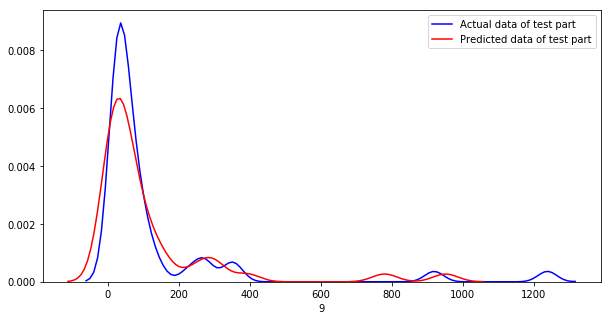

In [25]:
plt.figure(figsize = (10,5))
sb.distplot(Y_test2, hist = False, color = 'blue', label = 'Actual data of test part')
sb.distplot(Y_pred2, hist = False, color = 'red', label = 'Predicted data of test part')
plt.show()

==> Ta thấy chia dữ liệu 8:2 lại nâng cao R2 score lên đến 94.9%

** Thử xem một số biến có liên quan tuyến tính với nhau hay không:

In [26]:
matrx = pd.DataFrame(plot.iloc[:,:7])
corr = pd.DataFrame(matrx.corr())

In [27]:
corr

,2,3,4,5,6,7,8
2,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
3,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
4,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
5,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
6,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
7,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
8,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


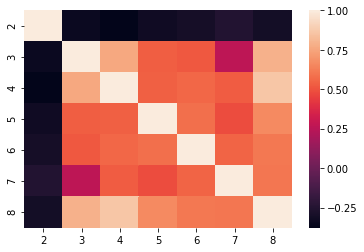

In [28]:
sb.heatmap(corr)

==> Dữ liệu cũng ít features liên quan tuyến tính với nhau, chỉ có 3 liên quan đến 8 và 4, nên em thử bỏ feature 3 để xem độ chính xác

In [29]:
X_drop3 = X.drop(3, axis = 1)
X_drop3.head()

,2,4,5,6,7,8,0_adviser,0_amdahl,0_apollo,0_basf,...,1_v8635,1_v8650,1_v8655,1_v8665,1_v8670,1_vax:11/730,1_vax:11/750,1_vax:11/780,1_vs-100,1_vs-90
0,125,6000,256,16,128,198,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29,32000,32,8,32,269,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,32000,32,8,32,220,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,32000,32,8,32,172,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,16000,32,8,16,132,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Y_drop3 = Y

In [31]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_drop3, Y_drop3, test_size = 0.2, random_state = 42)

model3 = LinearRegression()
model3.fit(X_train3, Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
Y_pred3 = model3.predict(X_test3)

In [33]:
print("Variance score: ", r2_score(Y_test3, Y_pred3))

Variance score:  0.94162331499881


In [34]:
model3.score(X_train3, Y_train3)

1.0

In [35]:
model3.score(X_test3, Y_test3)

0.94162331499881

In [36]:
model2.score(X, Y)

0.9767916612844302

==> Ta thấy r2 score giảm một chút sau khi bỏ đi feature đó, nên ta vẫn giữ nguyên data cũ 8:2 bên trên 

** Bước scaling dữ liệu:

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scale1 = X
X_scale1.iloc[:,:7] = scaler.fit_transform(X.iloc[:,:7])
pd.DataFrame(X_scale1).head()

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,2,3,4,5,6,7,8,0_adviser,0_amdahl,0_apollo,...,1_v8635,1_v8650,1_v8655,1_v8665,1_v8670,1_vax:11/730,1_vax:11/750,1_vax:11/780,1_vs-100,1_vs-90
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,0.575759,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,1.018277,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.712877,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.413710,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,0.164405,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_scale1, Y, test_size = 0.2, random_state = 42)

model4 = LinearRegression()
model4.fit(X_train4, Y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
Y_pred4 = model4.predict(X_test4)

In [40]:
print("Variance score: ", r2_score(Y_test4, Y_pred4))

Variance score:  0.9473215694419305


In [41]:
model4.score(X_train4, Y_train4)

1.0

In [42]:
model4.score(X_test4, Y_test4)

0.9473215694419305

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scale2 = X
X_scale2.iloc[:,:7] = scaler.fit_transform(X.iloc[:,:7])
pd.DataFrame(X_scale2).head()

,2,3,4,5,6,7,8,0_adviser,0_amdahl,0_apollo,...,1_v8635,1_v8650,1_v8655,1_v8665,1_v8670,1_vax:11/730,1_vax:11/750,1_vax:11/780,1_vs-100,1_vs-90
0,0.072825,0.006012,0.092843,1.000,0.307692,0.727273,0.167832,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.229895,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.187063,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.145105,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.008092,0.248497,0.249249,0.125,0.153846,0.090909,0.110140,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_scale2, Y, test_size = 0.2, random_state = 42)

model5 = LinearRegression()
model5.fit(X_train5, Y_train5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
Y_pred5 = model5.predict(X_test5)

In [46]:
print("Variance score: ", r2_score(Y_test5, Y_pred5))

Variance score:  0.888075127119343


In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_scale3 = X
X_scale3.iloc[:,:7] = scaler.fit_transform(X.iloc[:,:7])
pd.DataFrame(X_scale3).head()

,2,3,4,5,6,7,8,0_adviser,0_amdahl,0_apollo,...,1_v8635,1_v8650,1_v8655,1_v8665,1_v8670,1_vax:11/730,1_vax:11/750,1_vax:11/780,1_vs-100,1_vs-90
0,0.085714,-0.539604,-0.166667,7.75,2.8,6.315789,1.720930,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.462857,1.856436,2.000000,0.75,1.2,1.263158,2.546512,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.462857,1.856436,2.000000,0.75,1.2,1.263158,1.976744,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.462857,1.856436,2.000000,0.75,1.2,1.263158,1.418605,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.462857,1.856436,0.666667,0.75,1.2,0.421053,0.953488,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X_scale3, Y, test_size = 0.2, random_state = 42)

model6 = LinearRegression()
model6.fit(X_train6, Y_train6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
Y_pred6 = model6.predict(X_test6)

In [50]:
print("Variance score: ", r2_score(Y_test6, Y_pred6))

Variance score:  0.9488753683624889


In [51]:
model6.score(X_train6, Y_train6)

1.0

In [52]:
model6.score(X_test6, Y_test6)

0.9488753683624889

==> Nhận xét, sau khi scale dữ liệu, R2 của mô hình chỉ tăng được 0.1%, nên em vẫn sẽ tiếp tục sữ dụng bộ dữ liệu chưa scale

** Áp dụng polynomial regression:

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [54]:
poly.fit(X_poly, Y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [55]:
X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X_poly, Y, test_size = 0.2, random_state = 42)

model7 = LinearRegression()
model7.fit(X_train7, Y_train7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
Y_pred7 = model7.predict(X_test7)

In [57]:
print("Variance score: ", r2_score(Y_test7, Y_pred7))

Variance score:  0.9971346499879752


In [58]:
model7.score(X_train7, Y_train7)

1.0

In [59]:
model7.score(X_test7, Y_test7)

0.9971346499879751

In [60]:
model7.score(X_poly, Y)

0.9987013349525368

==> Không bị overfitting và underfitting

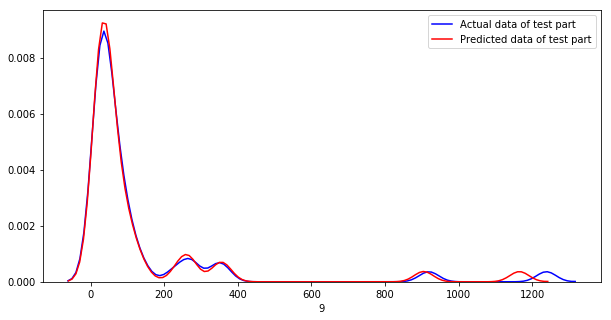

In [61]:
plt.figure(figsize = (10,5))
sb.distplot(Y_test7, hist = False, color = 'blue', label = 'Actual data of test part')
sb.distplot(Y_pred7, hist = False, color = 'red', label = 'Predicted data of test part')
plt.show()

==> Sau khi nâng X lên bậc 2, thì em thấy R2 score rất CAO là 99.7%. Nhưng theo em nghĩ, trong thực tế, điều này rất khó xảy ra, và nếu có xảy ra thì ta phải xem xét lại mô hình và dữ liệu.

** Thử với một số mô hình khác:

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [63]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [66]:
models = [
    DecisionTreeRegressor(criterion = 'mse'),
    RandomForestRegressor(n_estimators=100),
    KNeighborsRegressor(n_neighbors=3),
    SVR(kernel = 'linear'),
    LinearRegression()
]

CV = 5

cv_df = pd.DataFrame(index = range(CV * len(models)))

each_model = []

for model in models:
    r2 = []
    for i in range(5):
        model_name = model.__class__.__name__
        model.fit(X_train2, Y_train2)
        Y_pred = model.predict(X_test2)
        r = r2_score(Y_pred, Y_test2)
        r2.append(r)
    
    each_model.append([model_name, r2])

In [67]:
r2_model = np.array(each_model)
r2_model

array([['DecisionTreeRegressor',
        list([0.9357782341925855, 0.7314084007745989, 0.8012922799468003, 0.8005971607450393, 0.936034662420026])],
       ['RandomForestRegressor',
        list([0.7486208266037018, 0.7284434322257207, 0.7225238614149554, 0.7454030919983337, 0.7041006825183979])],
       ['KNeighborsRegressor',
        list([0.6519712297074236, 0.6519712297074236, 0.6519712297074236, 0.6519712297074236, 0.6519712297074236])],
       ['SVR',
        list([0.8249753568737956, 0.8249753568737956, 0.8249753568737956, 0.8249753568737956, 0.8249753568737956])],
       ['LinearRegression',
        list([0.9252927602860095, 0.9252927602860095, 0.9252927602860095, 0.9252927602860095, 0.9252927602860095])]],
      dtype=object)

==> Ta vẫn thấy mô hình Linear Regression là tốt nhất trong các mô hình

==> Em sẽ dùng mô hình Linear Regression với bậc 2 với độ chính xác 99.7% để dự đoán

** Dự đoán:

In [68]:
X_need_pred = pd.DataFrame(columns=X.columns)
X_need_pred

,2,3,4,5,6,7,8,0_adviser,0_amdahl,0_apollo,...,1_v8635,1_v8650,1_v8655,1_v8665,1_v8670,1_vax:11/730,1_vax:11/750,1_vax:11/780,1_vs-100,1_vs-90


In [69]:
temp = [['amdahl','470v/7b',29,8000,32000,32,8,32,172], ['sperry','1100/83',50,2000,32000,112,52,104,307]] 
X_need_pred = X_need_pred.append(pd.get_dummies(pd.DataFrame(temp)))
X_need_pred = X_need_pred.fillna(0)

In [70]:
X_need_pred

,2,3,4,5,6,7,8,0_adviser,0_amdahl,0_apollo,...,1_v8635,1_v8650,1_v8655,1_v8665,1_v8670,1_vax:11/730,1_vax:11/750,1_vax:11/780,1_vs-100,1_vs-90
0,29,8000,32000,32,8,32,172,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,50,2000,32000,112,52,104,307,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_poly_need = poly.fit_transform(X_need_pred)
results = model7.predict(X_poly_need)
results

array([1.17910203e+10, 1.12816073e+10])

In [72]:
model2.predict(X_need_pred)

array([253.        , 300.56167016])

In [74]:
model1.predict(X_need_pred)

array([253.       , 317.5295876])

==> ERP lần lượt là 253 và 300.6